In [1]:
#import Libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
plt.style.use ('ggplot')
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8, 4)

Ad_data = pd.read_csv('Advertising.csv', index_col=0)

In [2]:
Ad_data.head()

TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

In [3]:
Ad_data.shape

(200, 4)

In [4]:
Ad_data.describe

<bound method NDFrame.describe of         TV  radio  newspaper  sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3    9.3
4    151.5   41.3       58.5   18.5
5    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [5]:
Ad_data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [6]:
#Checking for Missing Values
for col in Ad_data.columns:
  missing = np.mean(Ad_data[col].isnull())
print('{} - {}%'.format(col, missing))

sales - 0.0%


In [7]:
#Rename Dataset columns
Ad_data.columns = ['TV','Radio','Newspaper','Sales']
Ad_data.head()

TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

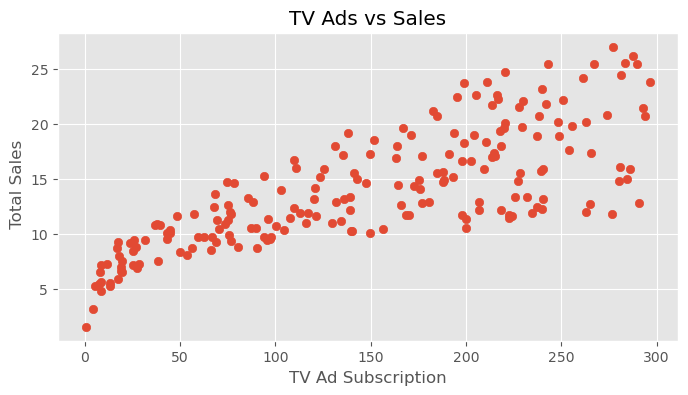

In [9]:
# Creating a scatter plots with Ads vs Sales

plt.scatter(x=Ad_data['TV'], y=Ad_data['Sales'])
plt.title('TV Ads vs Sales')
plt.xlabel('TV Ad Subscription')
plt.ylabel(' Total Sales')
plt.show()


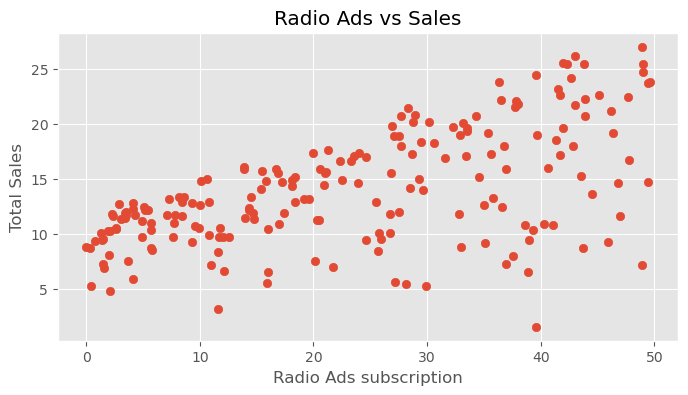

In [8]:
plt.scatter(x=Ad_data['Radio'], y=Ad_data['Sales'])
plt.title('Radio Ads vs Sales')
plt.xlabel('Radio Ads subscription')
plt.ylabel('Total Sales')
plt.show()

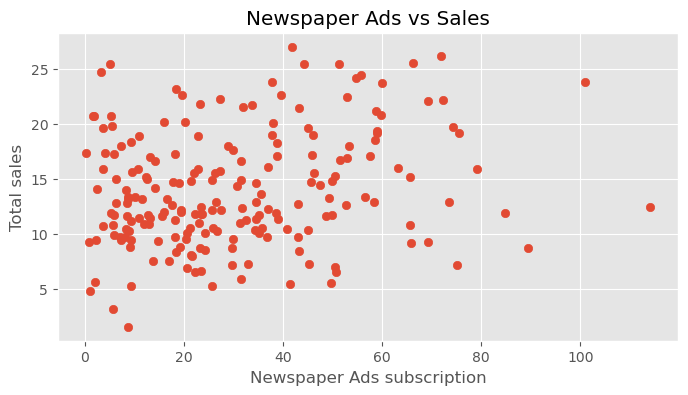

In [10]:
plt.scatter(x=Ad_data['Newspaper'], y=Ad_data['Sales'])
plt.title('Newspaper Ads vs Sales')
plt.xlabel('Newspaper Ads subscription')
plt.ylabel('Total sales')
plt.show()

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

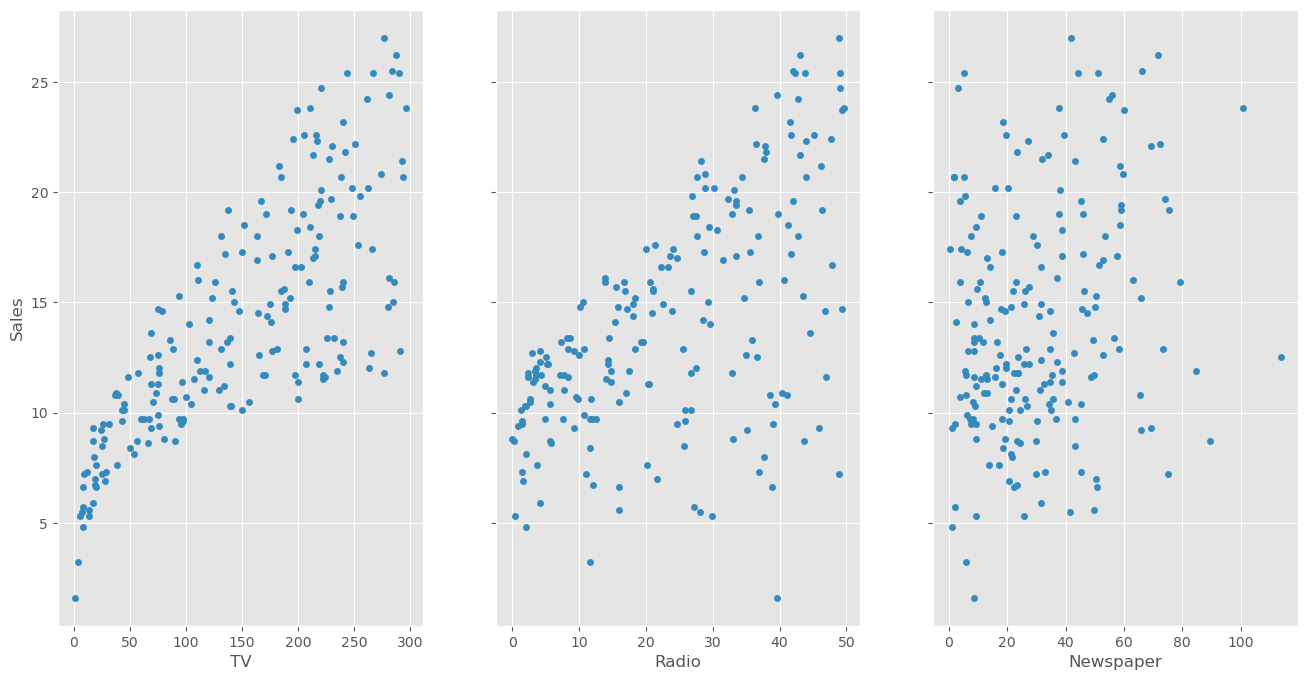

In [11]:
#ploting the Parameters side by side for a better comparative 

fig,axs = plt.subplots(1,3,sharey=True)
Ad_data.plot(kind='scatter',x='TV',y='Sales',ax=axs[0],figsize=(16,8))
Ad_data.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1])
Ad_data.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2])

<AxesSubplot:xlabel='TV', ylabel='Sales'>

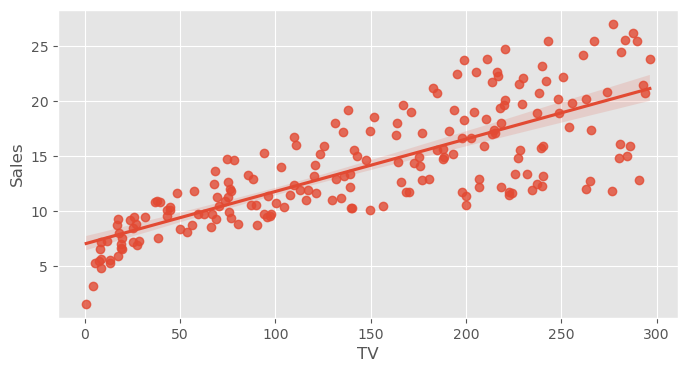

In [12]:
sns.regplot(x='TV', y='Sales', data=Ad_data)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

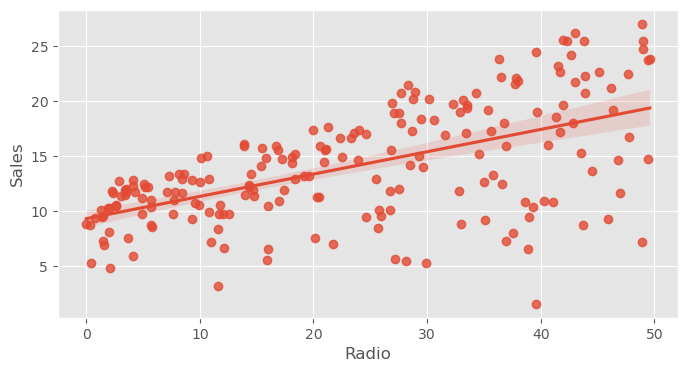

In [13]:
sns.regplot(x='Radio', y='Sales', data=Ad_data)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

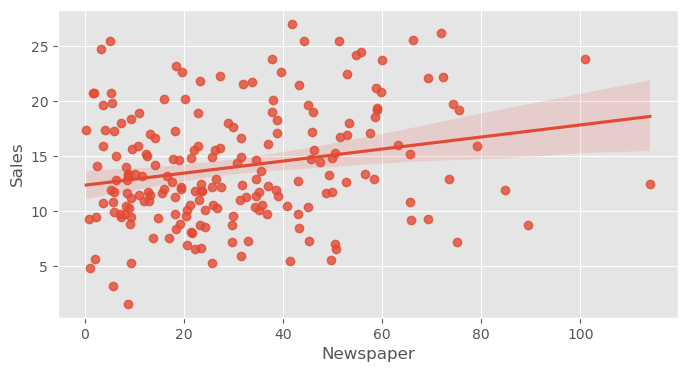

In [14]:
sns.regplot(x='Newspaper', y='Sales', data=Ad_data)

In [15]:
#looking at the correlation between Ads spending and Sales
Ad_data.corr(method='pearson')

TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000

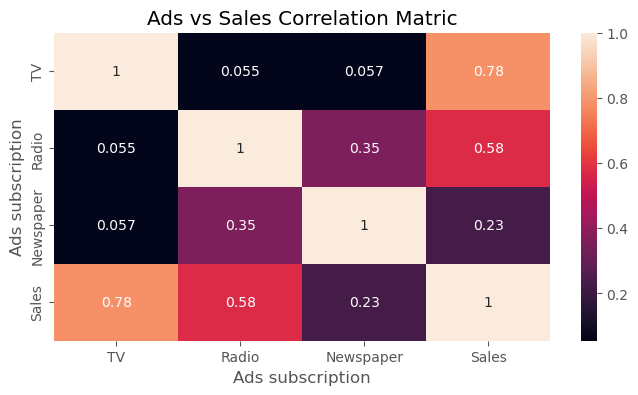

In [19]:
correlation_matrix=Ad_data.corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title( 'Ads vs Sales Correlation Matric')
plt.xlabel('Ads subscription')
plt.ylabel('Ads subscription')
plt.show()

In [17]:
#applying linear regression to get the relationship between Sales and Ads spending
feature_cols=['TV']
x= Ad_data[feature_cols]
y=Ad_data.Sales

In [18]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression() #initializing the Model
lm.fit(x,y) #Fitting the Model on X and Y axis

LinearRegression()

In [19]:
#showing that a unit increase in Television Ad spending is associated with a 0.047537 unit increase in Sales.
print(lm.intercept_)
print(lm.coef_)

7.0325935491276965
[0.04753664]


In [21]:
#this results shows that a unit increase in Ad Spending is Associated with a 0.0475 Increase in Sales.
#that means getting a predictor for a  #50,000 Increase in Ad spend will Result to a increase in Sales
7.032594 + 0.047537 * 50 

9.409444